In [4]:
import requests
import pandas as pd
import json
from bs4 import BeautifulSoup

In [2]:
url = 'https://coinmarketcap.com/currencies/celo/'
response = requests.get(url)

if response.status_code == 200:
    html = response.text
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

'<!DOCTYPE html><html lang="en" dir="ltr"><head><meta charSet="utf-8"/><meta http-equiv="x-ua-compatible" content="ie=edge"/><meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no, shrink-to-fit=no"/><script>(function() {var isInApp = navigator.userAgent.match(/CMCApp/i);if (!isInApp && !window.oneTrustScriptLoad) {window.oneTrustScriptLoad = true;document.write(\'<scr\'+\'ipt src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js" type="text/javascript" charset="UTF-8" data-domain-script="13729615-a271-4a5f-8eae-0c058b458464"></sc\'+\'ript><scr\'+\'ipt type="text/javascript"> function OptanonWrapper() {} </sc\'+\'ript>\');}\n})()</script><script>(function() {if (false) {window.__renderTime__.csrRender = 1699474578463;return;}window.__renderTime__ = {"pageInitStart":1699474578436,"pageInitEnd":1699474578459,"pageRender":1699474578463};window.__renderTime__.pageLoad = Date.now();})()</script><script>(function() {if (!!window.__RESOURCE
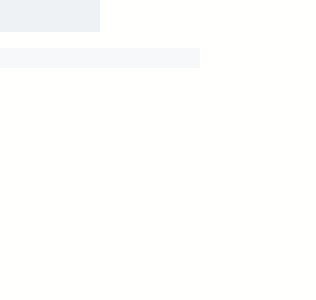

In [3]:
response.text

<!DOCTYPE html>
<html dir="ltr" lang="en"><head><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no, shrink-to-fit=no" name="viewport"/><script>(function() {var isInApp = navigator.userAgent.match(/CMCApp/i);if (!isInApp && !window.oneTrustScriptLoad) {window.oneTrustScriptLoad = true;document.write('<scr'+'ipt src="https://cdn.cookielaw.org/scripttemplates/otSDKStub.js" type="text/javascript" charset="UTF-8" data-domain-script="13729615-a271-4a5f-8eae-0c058b458464"></sc'+'ript><scr'+'ipt type="text/javascript"> function OptanonWrapper() {} </sc'+'ript>');}
})()</script><script>(function() {if (false) {window.__renderTime__.csrRender = 1699474578463;return;}window.__renderTime__ = {"pageInitStart":1699474578436,"pageInitEnd":1699474578459,"pageRender":1699474578463};window.__renderTime__.pageLoad = Date.now();})()</script><script>(function() {if (!!window.__RESOURCE_ERROR__) r
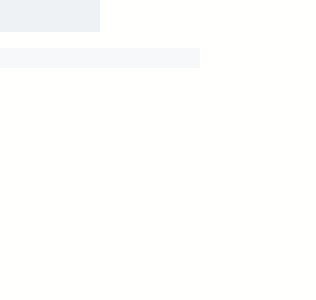

In [9]:
soup = BeautifulSoup(response.content, 'html.parser')
soup

In [10]:
soup.h1

<h1 class="sc-f70bb44c-0 gYiXVQ"><span class="sc-f70bb44c-0 SVbay" data-role="coin-name" title="Celo"><span>Celo <span class="sc-f70bb44c-0 iQEJet coin-name-mobile">price</span> </span></span><div class="sc-f70bb44c-0 fdOBt coin-symbol-wrapper"><span class="sc-f70bb44c-0 dXQGRd base-text" data-role="coin-symbol">CELO</span></div></h1>

In [16]:
soup.title.text

'Celo price today, CELO to USD live price, marketcap and chart | CoinMarketCap'

In [17]:
soup.find_all('span')

[<span class="sc-f70bb44c-0 jNqpFI base-text">Cryptos<!-- -->:</span>,
 <span class="sc-f70bb44c-0 jNqpFI base-text">Exchanges<!-- -->:</span>,
 <span class="sc-f70bb44c-0 jNqpFI base-text">Market Cap<!-- -->:</span>,
 <span class="sc-8a0bb4db-3 kDpZsL" color="var(--c-color-positive)">0.82%</span>,
 <span class="sc-f70bb44c-0 jNqpFI base-text">24h Vol<!-- -->:</span>,
 <span class="sc-8a0bb4db-3 fQibZj" color="var(--c-color-negative)">13.07%</span>,
 <span class="sc-f70bb44c-0 jNqpFI base-text">Dominance<!-- -->:</span>,
 <span class="sc-f70bb44c-0 jNqpFI base-text"><em class="sc-f70bb44c-0 hVdteT icon-Gas-Filled"></em> <!-- -->ETH Gas<!-- -->:</span>,
 <span class="sc-8a0bb4db-0 jSDGEg icon-Chevron-down"></span>,
 <span class="sc-f70bb44c-0 jNqpFI base-text"> <!-- -->Fear &amp; Greed<!-- -->:</span>,
 <span class="sc-f70bb44c-0 ihcLcj base-text">73<!-- -->/<!-- -->100</span>,
 <span class="sc-cda1c8a5-0 gPQemT">Cryptocurrencies</span>,
 <span class="sc-cda1c8a5-0 gPQemT">Dex Pairs</sp

In [ ]:
# Find the span element with the specified class
price_span = soup.find('span', class_='sc-f70bb44c-0 jxpCgO base-text')

In [18]:
if price_span:
    # Extract the price value
    price = price_span.text
    print(f"Price: {price}")
else:
    print("Price element not found on the page.")

Price: $0.553


In [20]:
price_span.text

'$0.553'

In [47]:
cryptos = ['xrp', 'bitcoin', 'ethereum', 'celo', 'kusama', 'chainlink', 'cosmos', 'decentraland']
price = []

for i in cryptos:
    url = f'https://coinmarketcap.com/currencies/{i}/'
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    market_cap_2023= soup.find('dd', class_ = "sc-f70bb44c-0 bCgkcs base-text")
    market_cap = market_cap_2023.text.strip().split('$')[1]
    price.append(f'{i}: ${market_cap}')

In [48]:
price

['xrp: $37,062,300,243',
 'bitcoin: $695,497,738,839',
 'ethereum: $227,809,217,457',
 'celo: $285,106,131',
 'kusama: $236,321,239',
 'chainlink: $8,119,373,786',
 'cosmos: $3,244,442,806',
 'decentraland: $806,397,456']

In [44]:
market_cap_2023= soup.find('dd', class_ = "sc-f70bb44c-0 bCgkcs base-text")
market_cap_2023.text.strip().split('$')[1]

'805,978,523'

In [50]:
from bs4 import BeautifulSoup


target_date = "12/10/2020"  # The date you want to find


# Find all date elements
date_elements = soup.find_all('div', class_='date')

for date_element in date_elements:
    # Extract the date from the span with class "primary"
    date = date_element.find('span', class_='primary').get_text(strip=True)
    
    if date == target_date:
        # If the date matches the target date, extract the price
        price_element = date_element.find('span', class_='number')
        if price_element:
            price = price_element.get_text(strip=True)
            print(f"Price on {target_date}: {price}")
        else:
            print(f"Price not found for {target_date}.")
        break
else:
    print(f"Date {target_date} not found in the HTML.")


Date 12/10/2020 not found in the HTML.


In [87]:
import requests

# Define the cryptocurrencies you want to get market cap data for
cryptos = ['ripple', 'kusama', 'stellar']

# Define the date you want to get the market cap for
date = '10-12-2020'  # December 10, 2020

# Initialize an empty dictionary to store the market cap data
market_cap_data = {}

# Make a request for each cryptocurrency
for crypto in cryptos:
    url = f'https://api.coingecko.com/api/v3/coins/{crypto}/history?date={date}'
    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        market_cap = data['market_data']['market_cap']['usd']
        market_cap_data[crypto] = market_cap
    else:
        print(f"Failed to fetch data for {crypto}")

# Print the market cap data for each cryptocurrency
for crypto, cap in market_cap_data.items():
    print(f"{crypto} Market Cap on {date}: ${cap:,}")


ripple Market Cap on 10-12-2020: $26,432,126,584.83739
kusama Market Cap on 10-12-2020: $440,536,760.5576394
stellar Market Cap on 10-12-2020: $3,728,641,364.8397546


In [66]:
# Define the URL for the "List of Supported Coins" endpoint
url = 'https://api.coingecko.com/api/v3/coins/list'

# Make a GET request to the endpoint
response = requests.get(url)

if response.status_code == 200:
    # Parse the response as JSON
    data = response.json()

    # Extract and print the list of supported cryptocurrency names (symbols)
    supported_crypto_names = [crypto['symbol'] for crypto in data]
    print("List of Supported Cryptocurrency Names (Symbols):")
    print(supported_crypto_names)
else:
    print("Failed to retrieve the list of supported cryptocurrencies.")


List of Supported Cryptocurrency Names (Symbols):
['zoc', 'zcn', '0kn', 'ome', 'vix', 'zrx', '0x0', '0x1', '0xaiswap', '0xa', 'coco', 'oxd', 'cafe', '0xfree', '0xf', '0xg', '0xgas', 'oxl', '0xlsd', '0xmr', '$0xs', 'shield', '0xs', 'tshp', '1art', '1eco', 'water', '1inch', 'yv1inch', '1mil', '1mb', '1mt', '1peco', '1rt', 'safu', '1sol', '1sol', '₿', '2049', '2080', '20weth-80bal', '28', 'vck', 'arms', '2dai', '2gcc', 'moon', '2omb', '2shares', 'fit', '3d3d', 'p3d', '3km', '3share', '3wild', 'xcal', '42', '4art', '4chan', '4dmaps', '4int', '4jnet', '50c', 'vgc', 'run', '888', 'mph', '8bit', '8pay', 'stz', '9inch', '9inch', 'ninefi', 'aa', 'a4', 'lenfi', 'aag', 'ardvrk', 'vark', 'aave', 'aaave', 'aammbptbalweth', 'aammbptwbtcweth', 'aammdai', 'aammuniaaveweth', 'aammunibatweth', 'aammunicrvweth', 'aammunidaiusdc', 'aammunidaiweth', 'aammunilinkweth', 'aammunimkrweth', 'aammunirenweth', 'aammunisnxweth', 'aammuniuniweth', 'aammuniusdcweth', 'aammuniwbtcusdc', 'aammuniwbtcweth', 'aammuniyfi

In [67]:
len(supported_crypto_names)

10827

In [68]:
import requests

# Define the URL for the "Get Coins Markets" endpoint with market cap sorting
url = 'https://api.coingecko.com/api/v3/coins/markets'
params = {
    'vs_currency': 'usd',  # Specify the currency for market cap (you can change this to other fiat or crypto)
    'order': 'market_cap_desc',  # Sort by market cap in descending order
    'per_page': 350,  # Number of cryptocurrencies to retrieve (adjust to 350)
    'page': 1  # Page number (you can adjust this if you want to paginate results)
}

# Make a GET request to the endpoint with the specified parameters
response = requests.get(url, params=params)

if response.status_code == 200:
    # Parse the response as JSON
    data = response.json()

    # Loop through the data to print the ranking based on market cap
    print("Top 350 Cryptocurrencies by Market Cap:")
    for index, crypto in enumerate(data, start=1):
        name = crypto['name']
        market_cap = crypto['market_cap']
        print(f"{index}. {name}: ${market_cap:,}")
else:
    print("Failed to retrieve the top 350 cryptocurrencies based on market cap.")


Top 350 Cryptocurrencies by Market Cap:
1. Bitcoin: $711,177,124,294
2. Ethereum: $242,406,450,301
3. Tether: $86,281,884,134
4. BNB: $37,938,881,649
5. XRP: $35,091,344,017
6. USDC: $24,263,890,798
7. Solana: $19,087,422,543
8. Lido Staked Ether: $18,071,825,359
9. Cardano: $12,661,276,511
10. Dogecoin: $10,111,210,315
11. TRON: $8,729,937,040
12. Chainlink: $8,172,748,788
13. Polygon: $7,420,377,084
14. Polkadot: $6,307,722,485
15. Wrapped Bitcoin: $5,954,316,760
16. Dai: $5,309,769,995
17. Toncoin: $5,245,193,276
18. Litecoin: $5,237,197,729
19. Shiba Inu: $4,821,302,250
20. Avalanche: $4,586,657,690
21. Bitcoin Cash: $4,536,825,194
22. LEO Token: $3,761,931,865
23. Uniswap: $3,746,329,929
24. Stellar: $3,408,013,687
25. OKB: $3,387,479,364
26. TrueUSD: $3,326,558,216
27. Monero: $2,945,627,394
28. Ethereum Classic: $2,703,468,407
29. Cosmos Hub: $2,476,698,423
30. Cronos: $2,125,881,521
31. Filecoin: $2,036,241,945
32. Hedera: $1,958,350,898
33. Lido DAO: $1,930,246,566
34. BUSD: $

In [69]:
import requests

# Define the URL for the "Get Coins Markets" endpoint with market cap sorting
url = 'https://api.coingecko.com/api/v3/coins/markets'
params = {
    'vs_currency': 'usd',  # Specify the currency for market cap (you can change this to other fiat or crypto)
    'order': 'market_cap_desc',  # Sort by market cap in descending order
    'per_page': 250,  # Number of cryptocurrencies to retrieve in each request
    'page': 1  # Start with the first page
}

# Initialize an empty list to store all the data
all_data = []

# Fetch data for all pages
while len(all_data) < 350:
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # Parse the response as JSON and append the data to the list
        data = response.json()
        all_data.extend(data)
        params['page'] += 1  # Move to the next page for the next request
    else:
        print("Failed to retrieve data.")
        break

# Print the top 350 cryptocurrencies by market cap
if all_data:
    print("Top 350 Cryptocurrencies by Market Cap:")
    for index, crypto in enumerate(all_data[:350], start=1):
        name = crypto['name']
        market_cap = crypto['market_cap']
        print(f"{index}. {name}: ${market_cap:,}")
else:
    print("No data retrieved.")


Top 350 Cryptocurrencies by Market Cap:
1. Bitcoin: $710,517,437,278
2. Ethereum: $243,267,021,743
3. Tether: $86,211,098,724
4. BNB: $37,946,853,482
5. XRP: $35,223,072,131
6. USDC: $24,245,976,794
7. Solana: $19,091,275,768
8. Lido Staked Ether: $18,088,438,152
9. Cardano: $12,677,162,850
10. Dogecoin: $10,166,974,783
11. TRON: $8,733,499,739
12. Chainlink: $8,182,075,061
13. Polygon: $7,456,914,871
14. Polkadot: $6,366,133,427
15. Wrapped Bitcoin: $5,958,490,045
16. Dai: $5,313,746,358
17. Toncoin: $5,266,915,265
18. Litecoin: $5,264,457,178
19. Shiba Inu: $4,853,401,490
20. Avalanche: $4,627,969,073
21. Bitcoin Cash: $4,547,113,759
22. LEO Token: $3,772,465,763
23. Uniswap: $3,750,375,281
24. OKB: $3,482,467,462
25. Stellar: $3,401,469,478
26. TrueUSD: $3,326,124,041
27. Monero: $2,962,852,880
28. Ethereum Classic: $2,734,866,044
29. Cosmos Hub: $2,487,820,604
30. Cronos: $2,131,986,602
31. Filecoin: $2,048,522,285
32. Hedera: $1,972,598,288
33. Lido DAO: $1,937,002,960
34. BUSD: $

In [86]:
data[0]

{'id': '10kswap-starknet-alpha', 'name': '10KSwap'}

In [83]:
url = 'https://api.coingecko.com/api/v3/exchanges/list'
response = requests.get(url)
data = response.json()
data

[{'id': '10kswap-starknet-alpha', 'name': '10KSwap'},
 {'id': '1bch', 'name': '1BCH'},
 {'id': '3xcalibur', 'name': '3xcalibur'},
 {'id': '9inch', 'name': '9inch'},
 {'id': 'aave', 'name': 'Aave'},
 {'id': 'abcc', 'name': 'ABCC'},
 {'id': 'acala_swap', 'name': 'Acala Swap'},
 {'id': 'acdx', 'name': 'ACDX'},
 {'id': 'ace', 'name': 'Ace'},
 {'id': 'acsi_finance', 'name': 'Acsi Finance'},
 {'id': 'aerodrome-base', 'name': 'Aerodrome (Base)'},
 {'id': 'aevo', 'name': 'Aevo'},
 {'id': 'agni-finance', 'name': 'Agni Finance'},
 {'id': 'agora_swap', 'name': 'Agora Swap'},
 {'id': 'alexgo', 'name': 'ALEX'},
 {'id': 'algebra_finance', 'name': 'Algebra finance'},
 {'id': 'alien-base', 'name': 'Alien Base'},
 {'id': 'alienfi', 'name': 'AlienFi'},
 {'id': 'allinxswap-opbnb', 'name': 'AllInXSwap (opBnb)'},
 {'id': 'alpha_five', 'name': 'Alpha5'},
 {'id': 'altcointrader', 'name': 'AltcoinTrader'},
 {'id': 'alterdice', 'name': 'AlterDice'},
 {'id': 'altmarkets', 'name': 'Altmarkets'},
 {'id': 'amatera

In [84]:
exchanges = []

for i in data:
    name = i['name']
    exchanges.append(name)

In [85]:
exchanges

['10KSwap',
 '1BCH',
 '3xcalibur',
 '9inch',
 'Aave',
 'ABCC',
 'Acala Swap',
 'ACDX',
 'Ace',
 'Acsi Finance',
 'Aerodrome (Base)',
 'Aevo',
 'Agni Finance',
 'Agora Swap',
 'ALEX',
 'Algebra finance',
 'Alien Base',
 'AlienFi',
 'AllInXSwap (opBnb)',
 'Alpha5',
 'AltcoinTrader',
 'AlterDice',
 'Altmarkets',
 'Amaterasu Finance',
 'Animeswap',
 'ApertureSwap',
 'Apeswap (Arbitrum)',
 'ApeSwap',
 'ApeSwap (Polygon)',
 'Apeswap (Telos)',
 'ApeX Pro',
 'Aprobit',
 'AQX',
 'Flipster',
 'Arbidex',
 'Arbswap',
 'Archerswap',
 'ArthSwap',
 'Ashswap',
 'Astroport (Classic)',
 'Astroport (Injective)',
 'Astroport (Neutron)',
 'Astroport (Sei)',
 'Astroport V2',
 'Astrovault',
 'AuroraSwap',
 'AutoShark Finance',
 'AUX Exchange',
 'AYIN',
 'Azbit',
 'B2BX',
 'BabyDogeSwap',
 'BabySwap',
 'Baguette',
 'Bakeryswap',
 'BakerySwap (Base)',
 'Bakkt',
 'Balanced',
 'Balancer V2',
 'Balancer V2 (Arbitrum)',
 'Balancer V2 (Gnosis)',
 'Balancer V2 (Polygon)',
 'Balancer V1',
 'Balancer V2 (Avalanche)',
